In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import matplotlib.pyplot as plt
# import seaborn as sns

from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from keras import models, layers # Framework for neural nets creating
from keras.layers import Dense, GlobalAveragePooling2D
from keras.callbacks import EarlyStopping
from keras.applications import Xception, VGG19, ResNet50, MobileNet, MobileNetV2
from keras.models import Model


import os, shutil # filesystem operations 
from os import listdir
from os.path import isfile, join

from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import confusion_matrix



import random
#import tensorflow_addons as tfa
#from keras import optimizers
#from keras.utils import image_dataset_from_directory
#%matplotlib inline
#from pathlib import Path

In [2]:
# GPU checking
device_names = tf.test.gpu_device_name()
device_names

''

In [3]:
batch_size = 32
#image_size = 256
target_size = (256,256)
input_shape = (256, 256, 3)

In [4]:
# GPU checking
device_names = tf.test.gpu_device_name()
device_names

batch_size = 32
#image_size = 256
target_size = (256,256)
input_shape = (256, 256, 3)

#Fetching train data and validation data and processing the data
train_datagen = ImageDataGenerator(rescale = 1.00 / 255.0)
val_datagen = ImageDataGenerator(rescale = 1.00 / 255.0)
test_datagen = ImageDataGenerator(rescale = 1.00 / 255.0)

train_dir = ''
test_dir = ''
val_dir = ''

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = target_size,
    batch_size = batch_size

)

validation_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size = target_size,
    batch_size = batch_size
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = target_size,
    batch_size = batch_size
)

Found 3115 images belonging to 36 classes.
Found 351 images belonging to 36 classes.
Found 359 images belonging to 36 classes.


In [5]:
classes_list = ['apple', 'banana', 'beetroot', 'bell pepper', 'cabbage', 'capsicum', 'carrot', 'cauliflower', 
                'chilli pepper', 'corn', 'cucumber', 'eggplant', 'garlic', 'ginger', 'grapes', 'jalepeno', 
                'kiwi', 'lemon', 'lettuce',  'mango', 'onion', 'orange',  'paprika', 
                'pear', 'peas', 'pineapple', 'pomegrante', 'potato', 'raddish', 'soy beans', 
                'spinach', 'sweetcorn', 'sweetpotato', 'tomato', 'turnip', 'watermelon']
len(classes_list)

36

In [6]:
model_xception = Xception(weights='imagenet', include_top=False, input_shape=input_shape)
model_vgg19 = VGG19(weights='imagenet', include_top=False, input_shape=input_shape)
model_resnet50 = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)
model_mobilenet = MobileNet(weights='imagenet', include_top=False, input_shape=input_shape)
model_mobilenetV2 = MobileNetV2(weights='imagenet', include_top=False, input_shape=input_shape)

model_xception.trainable = False
model_vgg19.trainable = False
model_resnet50.trainable = False
model_mobilenet.trainable = False
model_mobilenetV2.trainable = False

# VGG19

In [7]:
model_vgg19.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [8]:
# add new classifier layers
flat1 = model_vgg19.layers[-1].output
# flat1 = Flat(flat1)
flat1 = GlobalAveragePooling2D()(flat1)
class1 = layers.Dense(1024, activation='relu')(flat1)
class1 = layers.Dense(512, activation='relu')(class1)
class1 = layers.Dense(256, activation='relu')(class1)
# class1 = layers.Dense(128, activation='relu')(class1)
# class1 = layers.Dense(64, activation='relu')(class1)
output = layers.Dense(36, activation='sigmoid')(class1)
# define new model
modelVGG19 = Model(inputs=model_vgg19.inputs, outputs=output)
modelVGG19.compile(
  loss = "binary_crossentropy",
  optimizer="adam",
  metrics = ["acc"]
)
# summarize
modelVGG19.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [10]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

In [11]:
#Training the model with train data and judging this training with validation data
history1 = modelVGG19.fit(
    train_generator,
    batch_size=batch_size,
    epochs = 20,
    validation_data = validation_generator, 
    callbacks=[es],
    verbose=1)

c:\ProgramData\Anaconda3\lib\site-packages\PIL\Image.py:980: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


Epoch 1/20
98/98 [==============================] - 653s 7s/step - loss: 0.1468 - acc: 0.0533 - val_loss: 0.1200 - val_acc: 0.0997
Epoch 2/20
98/98 [==============================] - 639s 7s/step - loss: 0.1103 - acc: 0.1769 - val_loss: 0.0978 - val_acc: 0.2137
Epoch 3/20
98/98 [==============================] - 643s 7s/step - loss: 0.0926 - acc: 0.3271 - val_loss: 0.0746 - val_acc: 0.5299
Epoch 4/20
98/98 [==============================] - 618s 6s/step - loss: 0.0792 - acc: 0.4260 - val_loss: 0.0635 - val_acc: 0.5926
Epoch 5/20
98/98 [==============================] - 592s 6s/step - loss: 0.0700 - acc: 0.5098 - val_loss: 0.0513 - val_acc: 0.6866
Epoch 6/20
98/98 [==============================] - 594s 6s/step - loss: 0.0635 - acc: 0.5528 - val_loss: 0.0464 - val_acc: 0.6895
Epoch 7/20
98/98 [==============================] - 627s 6s/step - loss: 0.0586 - acc: 0.5849 - val_loss: 0.0457 - val_acc: 0.7179
Epoch 8/20
98/98 [==============================] - 603s 6s/step - loss: 0.0541 - a

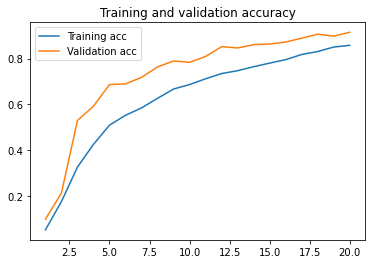

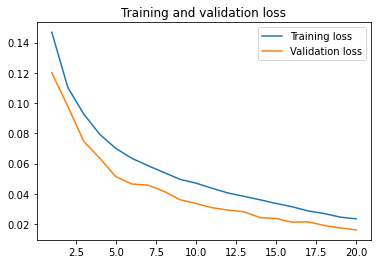

In [13]:
# Plot the train results
acc = history1.history['acc']
val_acc = history1.history['val_acc']
loss = history1.history['loss']
val_loss = history1.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, label='Training acc')
plt.plot(epochs, val_acc, label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
test_preds = modelVGG19.predict(test_generator)
test_pred_labels = np.argmax(test_preds, axis=1)
cm = confusion_matrix(test_generator.classes, test_pred_labels)
cm

12/12 [==============================] - 59s 5s/step


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [14]:
result = modelVGG19.evaluate(test_generator)

12/12 [==============================] - 77s 6s/step - loss: 0.0161 - acc: 0.9136


In [25]:
def plot_confusion_matrix(cm,
                      classes, 
                      normalized=False, 
                      title=None, 
                      cmap=plt.cm.Blues,
                      size=(16,12)):
    fig, ax = plt.subplots(figsize=size)
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)

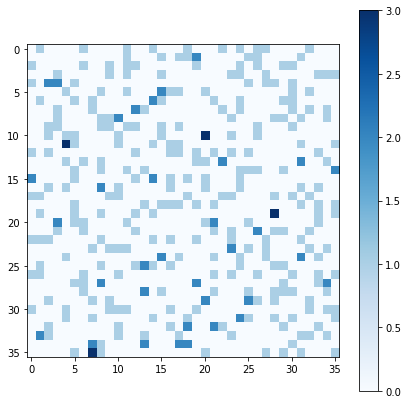

In [26]:
plot_confusion_matrix(cm,
                      classes_list, 
                      normalized=True, 
                      title="Model Performance", 
                      cmap=plt.cm.Blues,
                      size=(7, 7))

In [ ]:
save_dir = 'C:/Users/youngho-kwon/OneDrive/바탕 화면/SeoulTech/2023 4학년 1학기/캡스톤 디자인(1)/ingredient_classifier_project/Leftover_Hub/leftover_hub/models'
modelVGG19.save(save_dir+'/modelVGG19.h5')

# MobileNet

In [11]:
model_mobilenet.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 128, 128, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 128, 128, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 128, 128, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 128, 128, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 128, 128, 32)     128       
 ation)                                         

In [16]:
# add new classifier layers
flat1 = model_mobilenet.layers[-1].output
flat1 = GlobalAveragePooling2D()(flat1)
class1 = layers.Dense(1024, activation='relu')(flat1)
class1 = layers.Dense(512, activation='relu')(class1)
class1 = layers.Dense(256, activation='relu')(class1)
# class1 = layers.Dense(128, activation='relu')(class1)
# class1 = layers.Dense(64, activation='relu')(class1)
output = layers.Dense(36, activation='sigmoid')(class1)
# define new model
modelMobileNet = Model(inputs=model_mobilenet.inputs, outputs=output)
modelMobileNet.compile(
  loss = "binary_crossentropy",
  optimizer="adam",
  metrics = ["acc"]
)
# summarize
modelMobileNet.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 128, 128, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 128, 128, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 128, 128, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 128, 128, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 128, 128, 32)     128       
 ation)                                                    

In [18]:
#Training the model with train data and judging this training with validation data
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
history2 = modelMobileNet.fit(
    train_generator,
    batch_size=batch_size,
    epochs = 20,
    validation_data = validation_generator, 
    callbacks=[es],
    verbose=1)

Epoch 1/25
98/98 [==============================] - 162s 2s/step - loss: 0.0176 - acc: 0.9037 - val_loss: 0.0119 - val_acc: 0.9288
Epoch 2/25
 8/98 [=>............................] - ETA: 2:01 - loss: 0.0111 - acc: 0.9492

KeyboardInterrupt: 

In [ ]:
#save the trained model
save_dir = 'C:/Users/youngho-kwon/OneDrive/바탕 화면/SeoulTech/2023 4학년 1학기/캡스톤 디자인(1)/ingredient_classifier_project/Leftover_Hub/leftover_hub/models'
modelMobileNet.save(save_dir+'/modelMobileNet.h5')

In [ ]:
# Plot the train results
acc = history2.history['acc']
val_acc = history2.history['val_acc']
loss = history2.history['loss']
val_loss = history2.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, label='Training acc')
plt.plot(epochs, val_acc, label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

NameError: name 'history2' is not defined

In [ ]:
test_preds = modelMobileNet.predict(test_generator)
test_pred_labels = np.argmax(test_preds, axis=1)
cm = confusion_matrix(test_generator.classes, test_pred_labels)
cm

12/12 [==============================] - 21s 2s/step


array([[0, 0, 0, ..., 0, 1, 0],
       [0, 0, 1, ..., 2, 1, 1],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 2],
       [0, 0, 0, ..., 2, 1, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

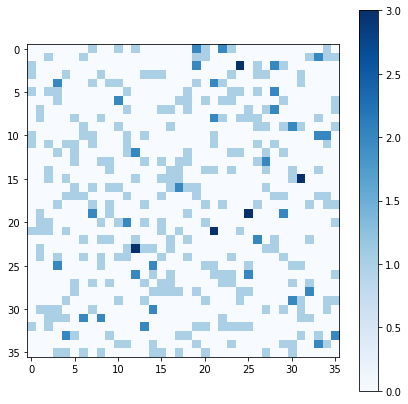

In [32]:
plot_confusion_matrix(cm,
                      classes_list, 
                      normalized=True, 
                      title="Model Performance", 
                      cmap=plt.cm.Blues,
                      size=(7, 7))

In [33]:
result = modelMobileNet.evaluate(test_generator)

12/12 [==============================] - 18s 1s/step - loss: 0.0105 - acc: 0.9554


# Xception

In [34]:
model_xception.summary()

Model: "xception"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 127, 127, 32  864         ['input_5[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 127, 127, 32  128        ['block1_conv1[0][0]']           
 ation)                         )                                                          

In [35]:
# add new classifier layers
flat1 = model_xception.layers[-1].output
# Pooling layer
flat1 = keras.layers.GlobalAveragePooling2D()(flat1)
class1 = layers.Dense(1024, activation='relu')(flat1)
class1 = layers.Dense(512, activation='relu')(class1)
class1 = layers.Dense(256, activation='relu')(class1)
# class1 = layers.Dense(128, activation='relu')(class1)
# class1 = layers.Dense(64, activation='relu')(class1)
output = layers.Dense(36, activation='sigmoid')(class1)
# define new model
model = Model(inputs=model_xception.inputs, outputs=output)
model.compile(
  loss = "binary_crossentropy",
  optimizer="adam",
  metrics = ["acc"]
)
# summarize
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 127, 127, 32  864         ['input_5[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 127, 127, 32  128        ['block1_conv1[0][0]']           
 ation)                         )                                                           

In [36]:
#Training the model with train data and judging this training with validation data
history3 = model.fit(
    train_generator,
    batch_size=batch_size,
    epochs = 20,
    validation_data = validation_generator, 
    callbacks=[es],
    verbose=1)

Epoch 1/20
21/98 [=====>........................] - ETA: 2:48 - loss: 0.2133 - acc: 0.0645

c:\ProgramData\Anaconda3\lib\site-packages\PIL\Image.py:980: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


98/98 [==============================] - 243s 2s/step - loss: 0.1030 - acc: 0.4276 - val_loss: 0.0375 - val_acc: 0.7778
Epoch 2/20
98/98 [==============================] - 240s 2s/step - loss: 0.0375 - acc: 0.7624 - val_loss: 0.0242 - val_acc: 0.8746
Epoch 3/20
98/98 [==============================] - 242s 2s/step - loss: 0.0274 - acc: 0.8205 - val_loss: 0.0176 - val_acc: 0.9088
Epoch 4/20
98/98 [==============================] - 240s 2s/step - loss: 0.0200 - acc: 0.8709 - val_loss: 0.0146 - val_acc: 0.9145
Epoch 5/20
98/98 [==============================] - 238s 2s/step - loss: 0.0151 - acc: 0.9030 - val_loss: 0.0115 - val_acc: 0.9288
Epoch 6/20
98/98 [==============================] - 240s 2s/step - loss: 0.0110 - acc: 0.9291 - val_loss: 0.0127 - val_acc: 0.9117
Epoch 7/20
98/98 [==============================] - 239s 2s/step - loss: 0.0086 - acc: 0.9480 - val_loss: 0.0094 - val_acc: 0.9373
Epoch 8/20
98/98 [==============================] - 240s 2s/step - loss: 0.0074 - acc: 0.9502 

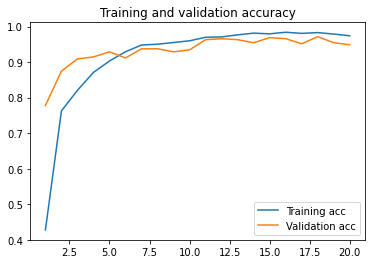

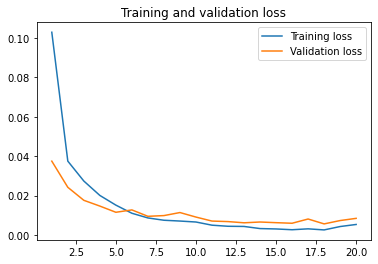

In [37]:
# Plot the train results
acc = history3.history['acc']
val_acc = history3.history['val_acc']
loss = history3.history['loss']
val_loss = history3.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, label='Training acc')
plt.plot(epochs, val_acc, label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [38]:
test_preds = model.predict(test_generator)
test_pred_labels = np.argmax(test_preds, axis=1)
cm = confusion_matrix(test_generator.classes, test_pred_labels)
cm

12/12 [==============================] - 31s 3s/step


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 1, 0],
       ...,
       [1, 0, 0, ..., 2, 0, 1],
       [1, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0]], dtype=int64)

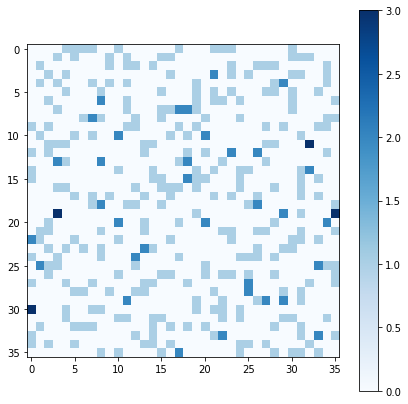

In [39]:
plot_confusion_matrix(cm,
                      classes_list, 
                      normalized=True, 
                      title="Model Performance", 
                      cmap=plt.cm.Blues,
                      size=(7, 7))

In [44]:
result = model.evaluate(test_generator)

12/12 [==============================] - 40s 3s/step - loss: 0.0087 - acc: 0.9471


# ResNet50

In [53]:
model_resnet50.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_11 (InputLayer)          [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 262, 262, 3)  0           ['input_11[0][0]']               
                                                                                                  
 conv1_conv (Conv2D)            (None, 128, 128, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

In [54]:
# add new classifier layers
flat1 = model_resnet50.layers[-1].output
flat1 = GlobalAveragePooling2D()(flat1)
class1 = layers.Dense(1024, activation='relu')(flat1)
class1 = layers.Dense(512, activation='relu')(class1)
class1 = layers.Dense(256, activation='relu')(class1)
# class1 = layers.Dense(128, activation='relu')(class1)
# class1 = layers.Dense(64, activation='relu')(class1)
output = layers.Dense(36, activation='sigmoid')(class1)
# define new model
modelResnet50 = Model(inputs=model_resnet50.inputs, outputs=output)
modelResnet50.compile(
  loss = "binary_crossentropy",
  optimizer="adam",
  metrics = ["acc"]
)
# summarize
modelResnet50.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_11 (InputLayer)          [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 262, 262, 3)  0           ['input_11[0][0]']               
                                                                                                  
 conv1_conv (Conv2D)            (None, 128, 128, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

In [55]:
#Training the model with train data and judging this training with validation data
history_resnet50 = modelResnet50.fit(
    train_generator,
    batch_size=batch_size,
    epochs = 20,
    validation_data = validation_generator, 
    callbacks=[es],
    verbose=1)

Epoch 1/20


c:\ProgramData\Anaconda3\lib\site-packages\PIL\Image.py:980: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


98/98 [==============================] - 297s 3s/step - loss: 0.1471 - acc: 0.0388 - val_loss: 0.1253 - val_acc: 0.0541
Epoch 2/20
98/98 [==============================] - 287s 3s/step - loss: 0.1251 - acc: 0.0616 - val_loss: 0.1229 - val_acc: 0.0627
Epoch 3/20
98/98 [==============================] - 291s 3s/step - loss: 0.1226 - acc: 0.0639 - val_loss: 0.1192 - val_acc: 0.0684
Epoch 4/20
98/98 [==============================] - 291s 3s/step - loss: 0.1212 - acc: 0.0671 - val_loss: 0.1172 - val_acc: 0.0997
Epoch 5/20
98/98 [==============================] - 293s 3s/step - loss: 0.1197 - acc: 0.0841 - val_loss: 0.1146 - val_acc: 0.0940
Epoch 6/20
98/98 [==============================] - 291s 3s/step - loss: 0.1184 - acc: 0.0941 - val_loss: 0.1138 - val_acc: 0.0940
Epoch 7/20
98/98 [==============================] - 290s 3s/step - loss: 0.1177 - acc: 0.1008 - val_loss: 0.1122 - val_acc: 0.1111
Epoch 8/20
98/98 [==============================] - 291s 3s/step - loss: 0.1160 - acc: 0.1149 

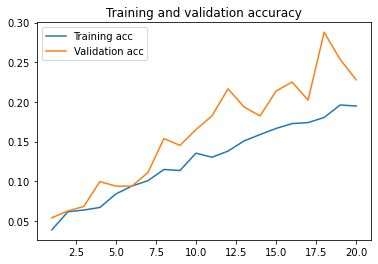

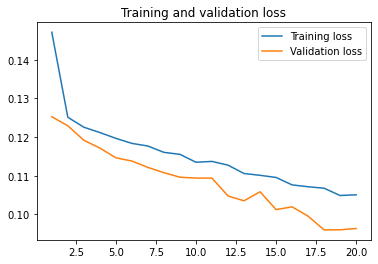

In [56]:
# Plot the train results
acc = history_resnet50.history['acc']
val_acc = history_resnet50.history['val_acc']
loss = history_resnet50.history['loss']
val_loss = history_resnet50.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, label='Training acc')
plt.plot(epochs, val_acc, label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [57]:
result = modelResnet50.evaluate(test_generator)

12/12 [==============================] - 39s 3s/step - loss: 0.0963 - acc: 0.2284


# MobileNetV2

In [7]:
model_mobilenetV2.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 128, 128, 32  864         ['input_5[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 128, 128, 32  128         ['Conv1[0][0]']                  
                                )                                              

In [8]:
# add new classifier layers
flat1 = model_mobilenetV2.layers[-1].output
flat1 = GlobalAveragePooling2D()(flat1)
class1 = layers.Dense(1024, activation='relu')(flat1)
class1 = layers.Dense(512, activation='relu')(class1)
class1 = layers.Dense(256, activation='relu')(class1)
# class1 = layers.Dense(128, activation='relu')(class1)
# class1 = layers.Dense(64, activation='relu')(class1)
output = layers.Dense(36, activation='sigmoid')(class1)
# define new model
modelMobileNetV2 = Model(inputs=model_mobilenetV2.inputs, outputs=output)
modelMobileNetV2.compile(
  loss = "binary_crossentropy",
  optimizer="adam",
  metrics = ["acc"]
)
# summarize
modelMobileNetV2.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 128, 128, 32  864         ['input_5[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 128, 128, 32  128         ['Conv1[0][0]']                  
                                )                                                             

In [9]:
#Training the model with train data and judging this training with validation data
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
historyMNV2 = modelMobileNetV2.fit(
    train_generator,
    batch_size=batch_size,
    epochs = 25,
    validation_data = validation_generator, 
    callbacks=[es],
    verbose=1)

Epoch 1/25
 1/98 [..............................] - ETA: 7:24 - loss: 0.7056 - acc: 0.1250

c:\ProgramData\Anaconda3\lib\site-packages\PIL\Image.py:980: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


98/98 [==============================] - 181s 2s/step - loss: 0.0979 - acc: 0.4568 - val_loss: 0.0332 - val_acc: 0.8234
Epoch 2/25
98/98 [==============================] - 175s 2s/step - loss: 0.0340 - acc: 0.7900 - val_loss: 0.0172 - val_acc: 0.9117
Epoch 3/25
98/98 [==============================] - 178s 2s/step - loss: 0.0214 - acc: 0.8761 - val_loss: 0.0151 - val_acc: 0.8917
Epoch 4/25
98/98 [==============================] - 172s 2s/step - loss: 0.0142 - acc: 0.9194 - val_loss: 0.0106 - val_acc: 0.9402
Epoch 5/25
98/98 [==============================] - 181s 2s/step - loss: 0.0101 - acc: 0.9470 - val_loss: 0.0094 - val_acc: 0.9459
Epoch 6/25
98/98 [==============================] - 182s 2s/step - loss: 0.0071 - acc: 0.9596 - val_loss: 0.0110 - val_acc: 0.9288
Epoch 7/25
98/98 [==============================] - 171s 2s/step - loss: 0.0057 - acc: 0.9666 - val_loss: 0.0066 - val_acc: 0.9601
Epoch 8/25
98/98 [==============================] - 174s 2s/step - loss: 0.0040 - acc: 0.9772 

In [11]:
save_dir = 'C:/Users/youngho-kwon/OneDrive/바탕 화면/SeoulTech/2023 4학년 1학기/캡스톤 디자인(1)/ingredient_classifier_project/Leftover_Hub/leftover_hub/models'
modelMobileNetV2.save(save_dir+'/modelMobileNetV2.h5')

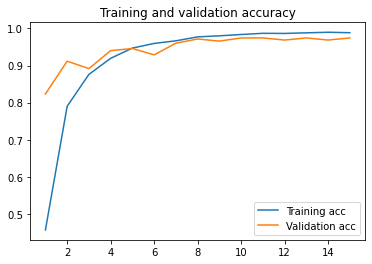

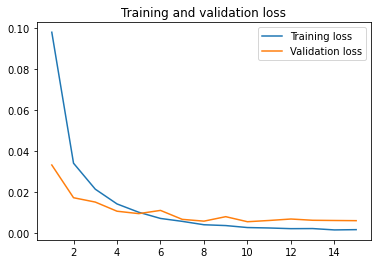

In [12]:
# Plot the train results
acc = historyMNV2.history['acc']
val_acc = historyMNV2.history['val_acc']
loss = historyMNV2.history['loss']
val_loss = historyMNV2.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, label='Training acc')
plt.plot(epochs, val_acc, label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [13]:
result = modelMobileNetV2.evaluate(test_generator)

12/12 [==============================] - 24s 2s/step - loss: 0.0059 - acc: 0.9749


In [61]:
import numpy as np
from PIL import Image

def preprocess_image(image_path, target_size=(256, 256)):
    image = Image.open(image_path)
    image = image.resize(target_size, Image.ANTIALIAS)
    image_array = np.array(image) / 255.0  # Normalize pixel values to [0, 1]
    return np.expand_dims(image_array, axis=0)  # Add batch dimension

image_path = ""
input_image = preprocess_image(image_path)
prediction = modelMobileNetV2.predict(input_image)

predicted_class_index = np.argmax(prediction)
predicted_class_label = classes_list[predicted_class_index]

print("Predicted class label:", predicted_class_label)

1/1 [==============================] - 0s 54ms/step
Predicted class label: cucumber


c:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  


In [6]:
import tensorflow as tf
save_dir = ''

loaded_model = tf.keras.models.load_model(save_dir+'/modelMobileNetV2.h5')

classes_list = ['apple', 'banana', 'beetroot', 'bell pepper', 'cabbage', 'capsicum', 'carrot', 'cauliflower', 
                'chilli pepper', 'corn', 'cucumber', 'eggplant', 'garlic', 'ginger', 'grapes', 'jalepeno', 
                'kiwi', 'lemon', 'lettuce',  'mango', 'onion', 'orange',  'paprika', 
                'pear', 'peas', 'pineapple', 'pomegrante', 'potato', 'raddish', 'soy beans', 
                'spinach', 'sweetcorn', 'sweetpotato', 'tomato', 'turnip', 'watermelon']
len(classes_list)

36

In [21]:
import numpy as np
from PIL import Image

def preprocess_image(image_path, target_size=(256, 256)):
    image = Image.open(image_path)
    image = image.resize(target_size, Image.ANTIALIAS)
    image_array = np.array(image) / 255.0  # Normalize pixel values to [0, 1]
    return np.expand_dims(image_array, axis=0)  # Add batch dimension

# Select the image for prediction
image_path = ""
image_path += "/apple1.jpg"
input_image = preprocess_image(image_path)
prediction = loaded_model.predict(input_image)

#Prediction
predicted_class_index = np.argmax(prediction)
predicted_class_label = classes_list[predicted_class_index]

print("Predicted class label:", predicted_class_label)

c:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  


1/1 [==============================] - 0s 58ms/step
Predicted class label: beetroot
